In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://covid.ourworldindata.org/data/internal/megafile--stringency.json"

In [3]:
response = requests.get(url)
data = response.json()

In [4]:
stringency_df = pd.DataFrame(data)

stringency_df.head()

,location,date,stringency_index,stringency_index_nonvac,stringency_index_vac,stringency_index_weighted_avg
0,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0
1,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0
2,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0
3,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0
4,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0


In [5]:
main_df = pd.read_csv("covid19-data.csv")

In [6]:
stringency_df.drop(stringency_df[['stringency_index_nonvac', 'stringency_index_vac', 'stringency_index_weighted_avg']], axis=1, inplace=True)

stringency_df.head()

,location,date,stringency_index
0,Afghanistan,2020-01-05,0.0
1,Afghanistan,2020-01-06,0.0
2,Afghanistan,2020-01-07,0.0
3,Afghanistan,2020-01-08,0.0
4,Afghanistan,2020-01-09,0.0


In [7]:
stringency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201592 entries, 0 to 201591
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   location          201592 non-null  object 
 1   date              201592 non-null  object 
 2   stringency_index  197292 non-null  float64
dtypes: float64(1), object(2)
memory usage: 4.6+ MB


In [8]:
# Get the stringency index for the countries at the end of 2020, (early start of 2021)

criteria = (stringency_df['date'] == "2021-01-01")

In [9]:
filtered_data = stringency_df.loc[criteria]

In [10]:
filtered_data.head()

,location,date,stringency_index
362,Afghanistan,2021-01-01,12.04
1454,Albania,2021-01-01,56.48
2546,Algeria,2021-01-01,72.22
3638,Andorra,2021-01-01,52.78
4730,Angola,2021-01-01,65.74


In [11]:
filtered_data['location'].sort_values()

362       Afghanistan
1454          Albania
2546          Algeria
3638          Andorra
4730           Angola
             ...     
196494      Venezuela
197586        Vietnam
198678          Yemen
199770         Zambia
200862       Zimbabwe
Name: location, Length: 184, dtype: object

In [12]:
filtered_data.shape

# This means we are missing 3 countries

(184, 3)

In [13]:
countries = list(stringency_df['location'].unique())

In [14]:
countries_in_main = list(main_df['Country'].unique())

In [15]:
print(len(countries))
print(len(countries_in_main))

185
187


In [16]:
missing_countries = set(countries_in_main) - set(countries)

In [17]:
missing_stringency = set(countries) - set(countries_in_main)

In [18]:
missing_stringency

{'Aruba',
 'Bermuda',
 'Cape Verde',
 'Congo',
 'Democratic Republic of Congo',
 'Faeroe Islands',
 'Guam',
 'Hong Kong',
 'Kiribati',
 'Macao',
 'Myanmar',
 'Palestine',
 'Puerto Rico',
 'Solomon Islands',
 'Taiwan',
 'Timor',
 'Tonga',
 'Turkmenistan',
 'United States',
 'United States Virgin Islands',
 'Vanuatu'}

In [19]:
missing_countries

{'Antigua and Barbuda',
 'Armenia',
 'Burma',
 'Cabo Verde',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Equatorial Guinea',
 'Grenada',
 'Guinea-Bissau',
 'Holy See',
 'Maldives',
 'Montenegro',
 'North Macedonia',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Sao Tome and Principe',
 'Taiwan*',
 'Timor-Leste',
 'US',
 'West Bank and Gaza',
 'Western Sahara'}

In [20]:
countries_in_main = main_df['Country'].unique()
countries = stringency_df['location'].unique()

missing_in_stringency = set(countries_in_main) - set(countries)
missing_in_main = set(countries) - set(countries_in_main)

print(f"Countries in main dataset but not in stringency index dataset after mapping: {missing_in_stringency}")
print(f"Countries in stringency index dataset but not in main dataset after mapping: {missing_in_main}")

Countries in main dataset but not in stringency index dataset after mapping: {'North Macedonia', 'Holy See', 'Comoros', 'Saint Kitts and Nevis', 'Congo (Kinshasa)', 'Maldives', 'Cabo Verde', 'Burma', 'US', 'Taiwan*', 'Congo (Brazzaville)', 'West Bank and Gaza', 'Sao Tome and Principe', 'Montenegro', 'Grenada', 'Armenia', 'Saint Vincent and the Grenadines', 'Guinea-Bissau', 'Western Sahara', 'Saint Lucia', 'Timor-Leste', 'Equatorial Guinea', 'Antigua and Barbuda'}
Countries in stringency index dataset but not in main dataset after mapping: {'Turkmenistan', 'Hong Kong', 'Tonga', 'Timor', 'Bermuda', 'United States', 'Puerto Rico', 'Vanuatu', 'Macao', 'United States Virgin Islands', 'Solomon Islands', 'Kiribati', 'Faeroe Islands', 'Aruba', 'Democratic Republic of Congo', 'Myanmar', 'Cape Verde', 'Guam', 'Congo', 'Palestine', 'Taiwan'}


In [21]:
country_mapping = {
    'United States': 'US',
    'United States Virgin Islands': 'Virgin Islands, US',
    'Democratic Republic of Congo': 'Congo (Kinshasa)',
    'Congo': 'Congo (Brazzaville)',
    'Myanmar': 'Burma',
    'Cape Verde': 'Cabo Verde',
    'Timor': 'Timor-Leste',
    'Taiwan': 'Taiwan*',
    'Hong Kong': 'Hong Kong SAR, China',
    'Macao': 'Macao SAR, China',
    'Faeroe Islands': 'Faroe Islands',
    'Palestine': 'West Bank and Gaza'
}

In [22]:
filtered_data.loc[:, 'location'] = filtered_data['location'].replace(country_mapping)

In [23]:
# Filter out unmatched countries only from the stringency dataset
stringency_df_filtered = filtered_data[~filtered_data['location'].isin(missing_in_main)]

In [24]:
# Merge the datasets on the standardized country names, keeping all countries in the main dataset
merged_df = main_df.merge(stringency_df_filtered, left_on='Country', right_on='location', how='left')

In [25]:
merged_df.head(10)

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,location,date,stringency_index
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,Afghanistan,2021-01-01,12.04
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,Albania,2021-01-01,56.48
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,Algeria,2021-01-01,72.22
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,Andorra,2021-01-01,52.78
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,Angola,2021-01-01,65.74
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas,NaN,NaN,NaN
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas,Argentina,2021-01-01,79.17
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe,NaN,NaN,NaN
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific,Australia,2021-01-01,70.83
9,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe,Austria,2021-01-01,82.41


In [26]:
merged_df.isnull().sum()

Country                    0
Confirmed                  0
Deaths                     0
Recovered                  0
Active                     0
New cases                  0
New deaths                 0
New recovered              0
Deaths / 100 Cases         0
Recovered / 100 Cases      0
Deaths / 100 Recovered     0
Confirmed last week        0
1 week change              0
1 week % increase          0
WHO Region                 0
location                  15
date                      15
stringency_index          16
dtype: int64

In [27]:
null_counts = merged_df[['Country', 'location', 'date', 'stringency_index']].isnull().sum(axis=1)

merged_df['null_count'] = null_counts
countries_with_many_nulls = merged_df[merged_df['null_count'] > 0]

In [28]:
countries_with_many_nulls[['Country', 'location', 'date', 'stringency_index', 'null_count']]

,Country,location,date,stringency_index,null_count
5,Antigua and Barbuda,NaN,NaN,NaN,3
7,Armenia,NaN,NaN,NaN,3
38,Comoros,NaN,NaN,NaN,3
54,Equatorial Guinea,NaN,NaN,NaN,3
55,Eritrea,Eritrea,2021-01-01,NaN,1
69,Grenada,NaN,NaN,NaN,3
72,Guinea-Bissau,NaN,NaN,NaN,3
75,Holy See,NaN,NaN,NaN,3
106,Maldives,NaN,NaN,NaN,3
115,Montenegro,NaN,NaN,NaN,3


In [29]:
merged_df['stringency_index']

0      12.04
1      56.48
2      72.22
3      52.78
4      65.74
       ...  
182    68.06
183      NaN
184    27.78
185    50.93
186    69.44
Name: stringency_index, Length: 187, dtype: float64

In [30]:
# The stringency index for countries is highly volatile and as such a backward or forward fill will not be a good choice. We opted for linear interpolation as it will estimate the missing values based on the trend of surrounding data

merged_df['stringency_index'] = merged_df['stringency_index'].interpolate(method='linear')

In [31]:
merged_df['stringency_index'].isnull().sum()

0

In [32]:
merged_df

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,location,date,stringency_index,null_count
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,Afghanistan,2021-01-01,12.04,0
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,Albania,2021-01-01,56.48,0
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,Algeria,2021-01-01,72.22,0
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,Andorra,2021-01-01,52.78,0
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,Angola,2021-01-01,65.74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean,West Bank and Gaza,2021-01-01,68.06,0
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa,NaN,NaN,47.92,3
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean,Yemen,2021-01-01,27.78,0
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa,Zambia,2021-01-01,50.93,0


In [33]:
merged_df.loc(merged_df.drop(['location', 'date', 'null_count'], axis=1, inplace=True))

In [34]:
merged_df.to_csv("covid19.csv", index=False)

In [35]:
# ------------ Note to Self, We reruning the notebook to perform more experiments

In [36]:
covid_df = pd.read_csv("covid19.csv")

Analyze Distribution of Strigency Index

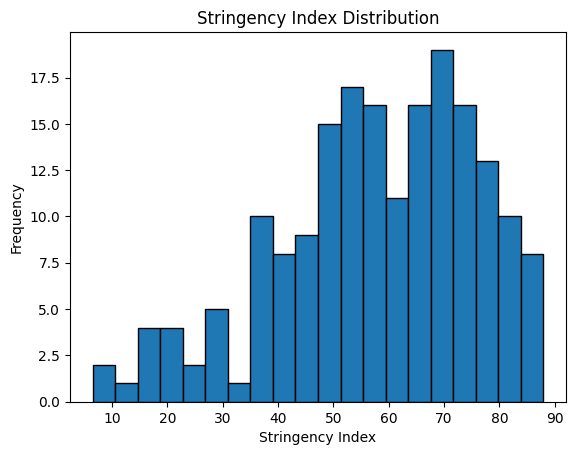

In [37]:
plt.hist(covid_df['stringency_index'], bins=20, edgecolor='black')
plt.xlabel('Stringency Index')
plt.ylabel('Frequency')
plt.title("Stringency Index Distribution")
plt.show()

Define Thresholds Using Quantiles

In [38]:
quantiles = covid_df['stringency_index'].quantile([0.33, 0.66])
low_threshold = quantiles[0.33]
high_threshold = quantiles[0.66]

In [39]:
print(f"Low threshold: {low_threshold}")
print(f"High threshold: {high_threshold}")

Low threshold: 51.85
High threshold: 67.59


Apply Categorization

In [40]:
def categorize_stringency(index):
    if index <= low_threshold:
        return 'Low'
    elif index <= high_threshold:
        return 'Medium'
    else:
        return 'High'

In [41]:
covid_df['stringency_category'] = covid_df['stringency_index'].apply(categorize_stringency)

In [43]:
file_path = 'covid19.csv'
data = pd.read_csv(file_path)

# Predefined dictionary of countries with their respective latitude and longitude
country_coords = {
    "Afghanistan": (33.93911, 67.709953),
    "Albania": (41.153332, 20.168331),
    "Algeria": (28.033886, 1.659626),
    "Andorra": (42.546245, 1.601554),
    "Angola": (-11.202692, 17.873887),
    "Antigua and Barbuda": (17.060816, -61.796428),
    "Argentina": (-38.416097, -63.616672),
    "Armenia": (40.069099, 45.038189),
    "Australia": (-25.274398, 133.775136),
    "Austria": (47.516231, 14.550072),
    "Azerbaijan": (40.143105, 47.576927),
    "Bahamas": (25.03428, -77.39628),
    "Bahrain": (25.930414, 50.637772),
    "Bangladesh": (23.684994, 90.356331),
    "Barbados": (13.193887, -59.543198),
    "Belarus": (53.709807, 27.953389),
    "Belgium": (50.503887, 4.469936),
    "Belize": (17.189877, -88.49765),
    "Benin": (9.30769, 2.315834),
    "Bhutan": (27.514162, 90.433601),
    "Bolivia": (-16.290154, -63.588653),
    "Bosnia and Herzegovina": (43.915886, 17.679076),
    "Botswana": (-22.328474, 24.684866),
    "Brazil": (-14.235004, -51.92528),
    "Brunei": (4.535277, 114.727669),
    "Bulgaria": (42.733883, 25.48583),
    "Burkina Faso": (12.238333, -1.561593),
    "Burundi": (-3.373056, 29.918886),
    "Cabo Verde": (16.002082, -24.013197),
    "Cambodia": (12.565679, 104.990963),
    "Cameroon": (7.369722, 12.354722),
    "Canada": (56.130366, -106.346771),
    "Central African Republic": (6.611111, 20.939444),
    "Chad": (15.454166, 18.732207),
    "Chile": (-35.675147, -71.542969),
    "China": (35.86166, 104.195397),
    "Colombia": (4.570868, -74.297333),
    "Comoros": (-11.875001, 43.872219),
    "Congo (Congo-Brazzaville)": (-0.228021, 15.827659),
    "Costa Rica": (9.748917, -83.753428),
    "Croatia": (45.1, 15.2),
    "Cuba": (21.521757, -77.781167),
    "Cyprus": (35.126413, 33.429859),
    "Czechia (Czech Republic)": (49.817492, 15.472962),
    "Denmark": (56.26392, 9.501785),
    "Djibouti": (11.825138, 42.590275),
    "Dominica": (15.414999, -61.370976),
    "Dominican Republic": (18.735693, -70.162651),
    "Ecuador": (-1.831239, -78.183406),
    "Egypt": (26.820553, 30.802498),
    "El Salvador": (13.794185, -88.89653),
    "Equatorial Guinea": (1.650801, 10.267895),
    "Eritrea": (15.179384, 39.782334),
    "Estonia": (58.595272, 25.013607),
    "Ethiopia": (9.145, 40.489673),
    "Fiji": (-17.713371, 178.065032),
    "Finland": (61.92411, 25.748151),
    "France": (46.603354, 1.888334),
    "Gabon": (-0.803689, 11.609444),
    "Gambia": (13.443182, -15.310139),
    "Georgia": (42.315407, 43.356892),
    "Germany": (51.165691, 10.451526),
    "Ghana": (7.946527, -1.023194),
    "Greece": (39.074208, 21.824312),
    "Grenada": (12.262776, -61.604171),
    "Guatemala": (15.783471, -90.230759),
    "Guinea": (9.945587, -9.696645),
    "Guinea-Bissau": (11.803749, -15.180413),
    "Guyana": (4.860416, -58.93018),
    "Haiti": (18.971187, -72.285215),
    "Honduras": (15.199999, -86.241905),
    "Hungary": (47.162494, 19.503304),
    "Iceland": (64.963051, -19.020835),
    "India": (20.593684, 78.96288),
    "Indonesia": (-0.789275, 113.921327),
    "Iran": (32.427908, 53.688046),
    "Iraq": (33.223191, 43.679291),
    "Ireland": (53.41291, -8.24389),
    "Israel": (31.046051, 34.851612),
    "Italy": (41.87194, 12.56738),
    "Jamaica": (18.109581, -77.297508),
    "Japan": (36.204824, 138.252924),
    "Jordan": (30.585164, 36.238414),
    "Kazakhstan": (48.019573, 66.923684),
    "Kenya": (-0.023559, 37.906193),
    "Kiribati": (-3.370417, -168.734039),
    "Kuwait": (29.31166, 47.481766),
    "Kyrgyzstan": (41.20438, 74.766098),
    "Laos": (19.85627, 102.495496),
    "Latvia": (56.879635, 24.603189),
    "Lebanon": (33.854721, 35.862285),
    "Lesotho": (-29.609988, 28.233608),
    "Liberia": (6.428055, -9.429499),
    "Libya": (26.3351, 17.228331),
    "Liechtenstein": (47.166, 9.555373),
    "Lithuania": (55.169438, 23.881275),
    "Luxembourg": (49.815273, 6.129583),
    "Madagascar": (-18.766947, 46.869107),
    "Malawi": (-13.254308, 34.301525),
    "Malaysia": (4.210484, 101.975766),
    "Maldives": (3.202778, 73.22068),
    "Mali": (17.570692, -3.996166),
    "Malta": (35.937496, 14.375416),
    "Marshall Islands": (7.131474, 171.184478),
    "Mauritania": (21.00789, -10.940835),
    "Mauritius": (-20.348404, 57.552152),
    "Mexico": (23.634501, -102.552784),
    "Micronesia": (7.425554, 150.550812),
    "Moldova": (47.411631, 28.369885),
    "Monaco": (43.750298, 7.412841),
    "Mongolia": (46.862496, 103.846656),
    "Montenegro": (42.708678, 19.37439),
    "Morocco": (31.791702, -7.09262),
    "Mozambique": (-18.665695, 35.529),
    "Namibia": (-22.95764, 18.49041),
    "Nepal": (28.394857, 84.124008),
    "Netherlands": (52.132633, 5.291266),
    "New Zealand": (-40.900557, 174.885971),
    "Nicaragua": (12.865416, -85.207229),
    "Niger": (17.607789, 8.081666),
    "Nigeria": (9.081999, 8.675277),
    "North Macedonia": (41.608635, 21.745275),
    "Norway": (60.472024, 8.468946),
    "Oman": (21.512583, 55.923255),
    "Pakistan": (30.375321, 69.345116),
    "Panama": (8.537981, -80.782127),
    "Papua New Guinea": (-6.314993, 143.95555),
    "Paraguay": (-23.442503, -58.443832),
    "Peru": (-9.189967, -75.015152),
    "Philippines": (12.879721, 121.774017),
    "Poland": (51.919438, 19.145136),
    "Portugal": (39.399872, -8.224454),
    "Qatar": (25.354826, 51.183884),
    "Romania": (45.943161, 24.96676),
    "Russia": (61.52401, 105.318756),
    "Rwanda": (-1.940278, 29.873888),
    "Saint Kitts and Nevis": (17.357822, -62.782998),
    "Saint Lucia": (13.909444, -60.978893),
    "Saint Vincent and the Grenadines": (12.984305, -61.287228),
    "San Marino": (43.94236, 12.457777),
    "Sao Tome and Principe": (0.18636, 6.613081),
    "Saudi Arabia": (23.885942, 45.079162),
    "Senegal": (14.497401, -14.452362),
    "Serbia": (44.016521, 21.005859),
    "Seychelles": (-4.679574, 55.491977),
    "Sierra Leone": (8.460555, -11.779889),
    "Singapore": (1.352083, 103.819836),
    "Slovakia": (48.669026, 19.699024),
    "Slovenia": (46.151241, 14.995463),
    "Somalia": (5.152149, 46.199616),
    "South Africa": (-30.559482, 22.937506),
    "South Korea": (35.907757, 127.766922),
    "South Sudan": (4.859363, 31.571251),
    "Spain": (40.463667, -3.74922),
    "Sri Lanka": (7.873054, 80.771797),
    "Sudan": (12.862807, 30.217636),
    "Suriname": (3.919305, -56.027783),
    "Sweden": (60.128161, 18.643501),
    "Switzerland": (46.818188, 8.227512),
    "Syria": (34.802075, 38.996815),
    "Taiwan*": (23.69781, 120.960515),
    "Tajikistan": (38.861034, 71.276093),
    "Tanzania": (-6.369028, 34.888822),
    "Thailand": (15.870032, 100.992541),
    "Timor-Leste": (-8.874217, 125.727539),
    "Togo": (8.619543, 0.824782),
    "Trinidad and Tobago": (10.691803, -61.222503),
    "Tunisia": (33.886917, 9.537499),
    "Turkey": (38.963745, 35.243322),
    "US": (37.09024, -95.712891),
    "Uganda": (1.373333, 32.290275),
    "Ukraine": (48.379433, 31.16558),
    "United Arab Emirates": (23.424076, 53.847818),
    "United Kingdom": (55.378051, -3.435973),
    "Uruguay": (-32.522779, -55.765835),
    "Uzbekistan": (41.377491, 64.585262),
    "Venezuela": (6.42375, -66.58973),
    "Vietnam": (14.058324, 108.277199),
    "West Bank and Gaza": (31.952162, 35.233154),
    "Western Sahara": (24.215527, -12.885834),
    "Yemen": (15.552727, 48.516388),
    "Zambia": (-13.133897, 27.849332),
    "Zimbabwe": (-19.015438, 29.154857)
}


# Function to get latitude and longitude from predefined dictionary
def get_lat_lon(country):
    return pd.Series(country_coords.get(country, (None, None)))


# Add latitude and longitude columns
data[['Latitude', 'Longitude']] = data['Country'].apply(get_lat_lon)

# Save the updated dataframe to a new CSV file
output_file_path = 'covid19.csv'
data.to_csv(output_file_path, index=False)

# Display the first few rows of the updated dataframe
print(data.head())

       Country  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0  Afghanistan      36263    1269      25198    9796        106          10   
1      Albania       4880     144       2745    1991        117           6   
2      Algeria      27973    1163      18837    7973        616           8   
3      Andorra        907      52        803      52         10           0   
4       Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1               